redweb3d

In [23]:
from tqdm.notebook import tqdm
import glob
import torch
import sys
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# 确保能够导入application和sfv2_networks模块
sys.path.append('/data1/Chenbingyuan/Trans_G2')
from application.application_utils import RGBPReader
from sfv2_networks import sfv2_UNet_visual

# 设置GPU设备索引并指定使用的GPU设备
gpu_index = 0
torch.cuda.set_device(gpu_index)

# 加载目录和文件
rgbd_dir = '/data1/Chenbingyuan/Trans_G2/application/paper/visual/Ibims/rgb'
rgb_files = glob.glob(rgbd_dir + '/**/*dis.png', recursive=True)
rgbd_reader = RGBPReader()
network = sfv2_UNet_visual(rezero=True)
model_dir = '/data1/Chenbingyuan/result_g2/_rz_sb_mar_sfv2_DIODE_HRWSI/models/epoch_60.pth'
network = network.cuda()
network.load_state_dict(torch.load(model_dir, map_location=f'cuda:{gpu_index}')['network_state_dict'], strict=True)
network.eval()

# 自定义DPI值
# custom_dpi = 1200  # 例如，设置DPI为300
# 定义每个标题对应的cmap
title_to_cmap = {
    'RGB': None,  # RGB图像不使用cmap
    'Point': 'jet',
    'Unscale Depth': 'jet',
    'Depth': 'jet',
    'GT': 'jet',
    'S': 'Blues',
    'F': 'Oranges',
    'Probability': 'PuOr'
}
rgb_files = ['/data1/Chenbingyuan/Trans_G2/g2_dataset/VKITTI/result/rz_sb_mar_sfv2_DIODE_HRWSI_0.2/VKITTI_gt/00045.png']
def min_max(tensor) :
    # prob_min = tensor.min()
    # prob_max = tensor.max()
    # return ((tensor - prob_min) / (prob_max - prob_min))
    return tensor
# 读取和处理每个RGB文件
for index, rgb_file in enumerate(rgb_files):
    point_file = rgb_file.replace('dis.png', '.png').replace('/rgb/', '/point/')
    gt_file = rgb_file.replace('dis.png', 'crop.png').replace('/rgb/', '/gt/')
    rgb, point, hole_point = rgbd_reader.read_rgbp(rgb_file, point_file)
    gt = torch.from_numpy(np.array(Image.open(gt_file), dtype=np.float32) / 255.).unsqueeze(0)
    unscale_depth, depth, s, f, prob = network(rgb.cuda(), point.cuda(), hole_point.cuda())
    
    # 最大最小值归一化 prob 张量
    prob_min = prob.min()
    prob_max = prob.max()
    prob_normalized = (prob - prob_min) / (prob_max - prob_min)
    
    
    # 使用2行4列的布局调整可视化，并为适用的图像添加颜色条
    # fig, axs = plt.subplots(2, 4, figsize=(10, 5), dpi=custom_dpi)
    fig, axs = plt.subplots(2, 4, figsize=(10, 5))
    axs = axs.flatten()

    # 指定绘图的顺序和标题
    items = [(rgb, 'RGB'), (min_max(point), 'Point'), (min_max(unscale_depth), 'Unscale Depth'),
            (min_max(depth), 'Depth'), (gt, 'GT'), (s, 'S'), (f, 'F'), (prob_normalized, 'Probability')]

    for i, (tensor, title) in enumerate(items):
        ax = axs[i]
        cmap = title_to_cmap[title]  # 从字典中获取cmap
        if title == 'RGB':
            img = tensor.squeeze().detach().cpu().numpy().transpose((1, 2, 0))
            im = ax.imshow(img)
        else:
            img = tensor.squeeze().detach().cpu().numpy()
            if title == 'S':vmin, vmax = (0,2)
            elif title == 'F':vmin, vmax = (-1,1)
            else: vmin, vmax = (0, 1)  # 已经归一化，所以直接使用0和1作为vmin和vmax
            
            im = ax.imshow(img, cmap=cmap, vmin=vmin, vmax=vmax)
        ax.set_title(title)
        ax.axis('off')
    del rgb, point, hole_point, gt, unscale_depth, depth, s, f, prob, prob_normalized

    plt.tight_layout()
    plt.show()

    save_dir = '/data1/Chenbingyuan/Trans_G2/application/paper/visual/VKITTI/show/'
    # plt.savefig(save_dir +f'image_{index}.png')
del network, rgbd_reader, rgb_files
torch.cuda.empty_cache()  # 再次清理GPU缓存


SyntaxError: invalid syntax (3927061341.py, line 6)

/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/result/rz_sb_mar_LRRU_0.2/UnrealCV_gt/0985.png
/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/result/rz_sb_mar_ReDC_0.2/UnrealCV_gt/0985.png
/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/val/UnrealCV_rgb/0985dis.png
/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/point/point_0.2/UnrealCV_gt/0985.png
/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/val/UnrealCV_gt/0985crop.png


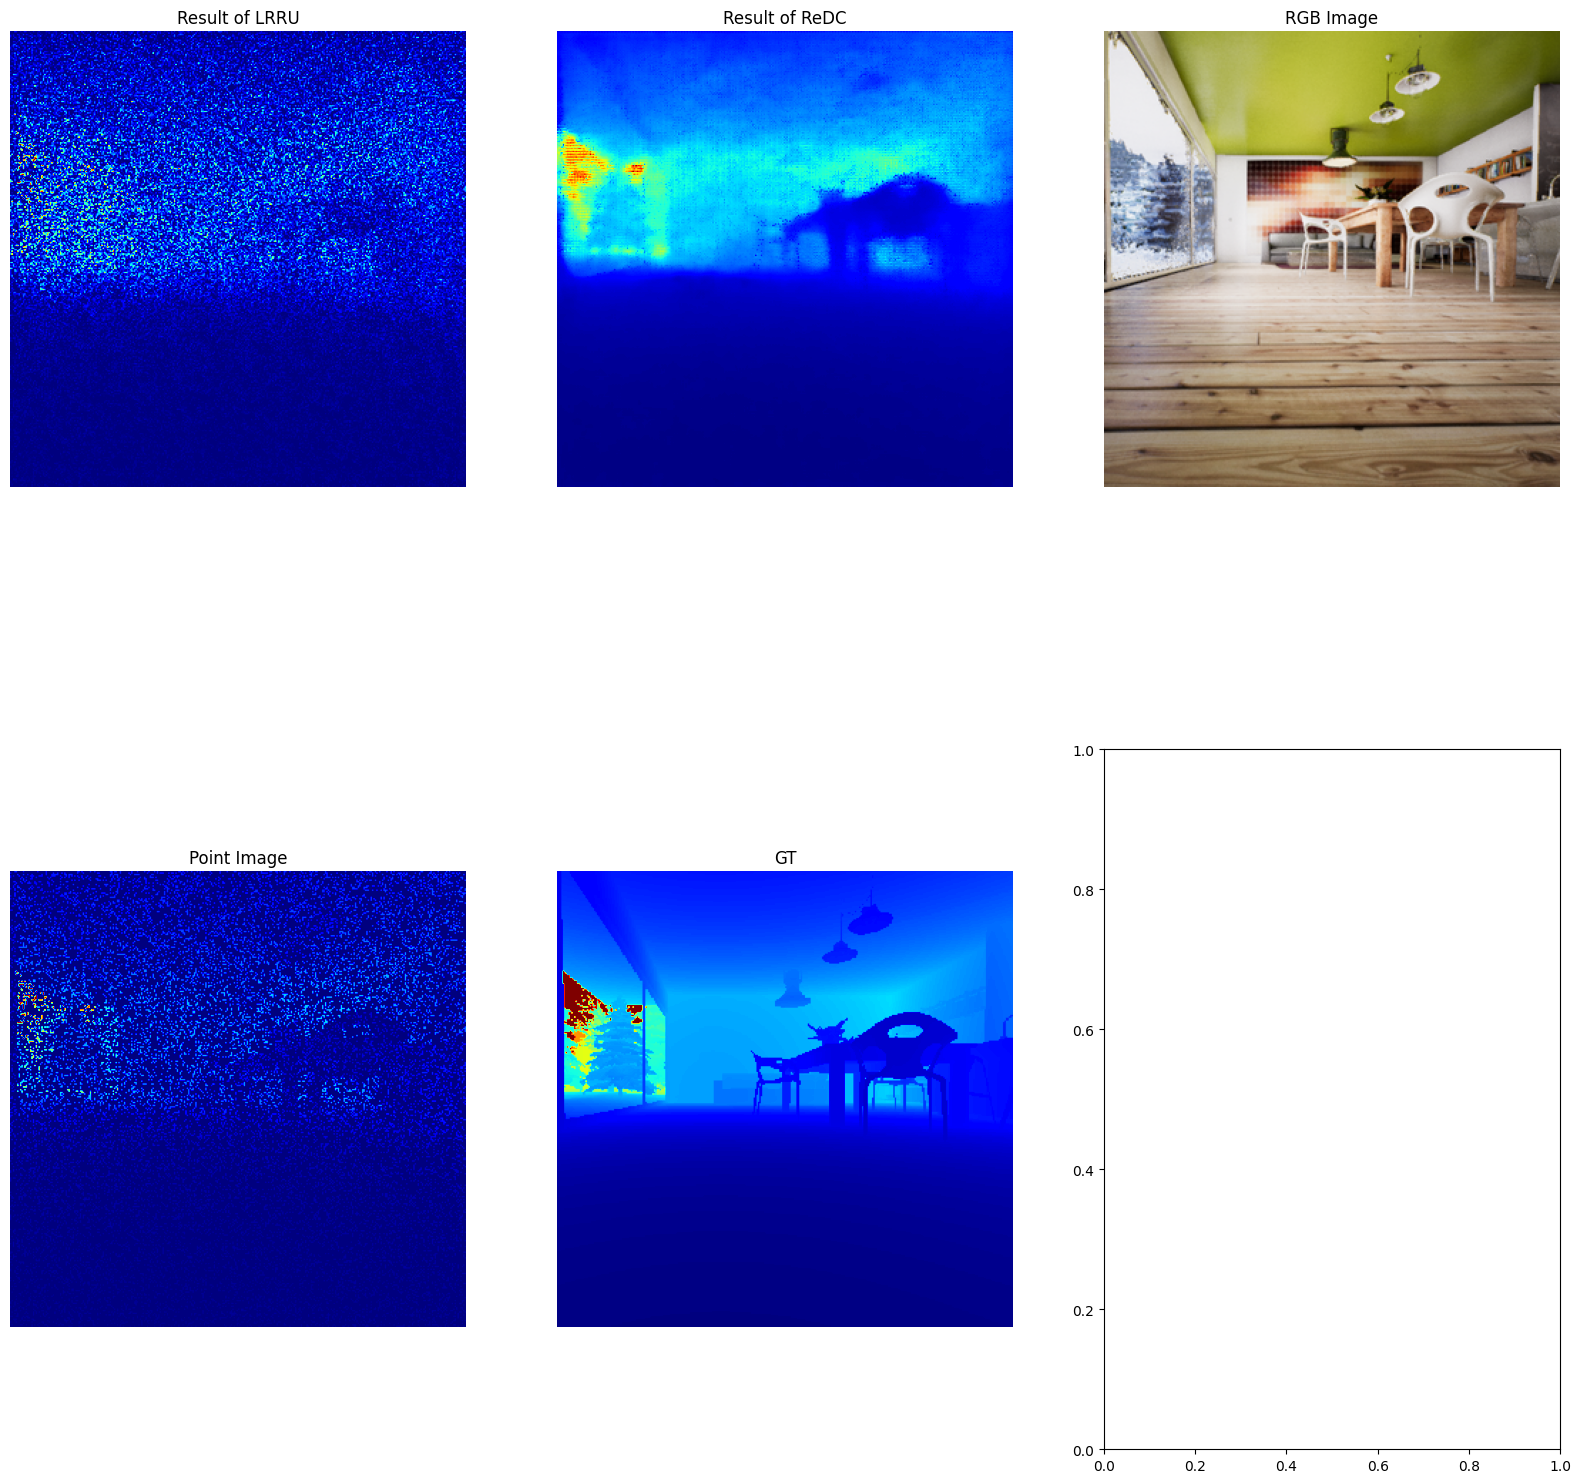

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
# /data1/Chenbingyuan/Trans_G2/g2_dataset/Ibims/val/Ibims_rgb/corridor_04.png
# /data1/Chenbingyuan/Trans_G2/g2_dataset/VKITTI/val/VKITTI_rgb/00011dis.png
# image_path = "/data1/Chenbingyuan/Trans_G2/g2_dataset/redweb/point/point_0.1/redweb_gt/2148644134_55e8221ccc_b.png"
# image_path = '/data1/Chenbingyuan/Trans_G2/g2_dataset/nyu/point/point_0.1/NYUv2_gt/14.png'
# image_path = '/data1/Chenbingyuan/Trans_G2/g2_dataset/nyu/point/point_0.1/NYUv2_gt/25.png'
# image_path = '/data1/Chenbingyuan/Trans_G2/g2_dataset/VKITTI/result/rz_sb_mar_sfv2_DIODE_HRWSI_0.1/VKITTI_gt/00066.png'
# '/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/result/rz_sb_mar_sfv2_DIODE_HRWSI_0.2/UnrealCV_gt/0030.png
# '/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/point/point_0.2/UnrealCV_gt/0000.png'
# '/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/result/rz_sb_mar_sfv2_DIODE_HRWSI_0.2/UnrealCV_gt/0030.png'
# /data1/Chenbingyuan/Trans_G2/g2_dataset/Matterport3D/val/Matterport3D_rgb/fc94c2a0445640028200b2f96e1fe90c_1_3dis.png
# /data1/Chenbingyuan/Trans_G2/g2_dataset/Matterport3D/val/Matterport3D_rgb/fc94c2a0445640028200b2f96e1fe90c_1_3dis.png
# /data1/Chenbingyuan/Trans_G2/g2_dataset/redweb/val/redweb_rgb/3037970905_7da772db19_bdis.jpg


# nyu 16
# '/home/panlingzhi/BY_Diffusion/g2_dataset/redweb/val/redweb_rgb/20773695213_87ea5375d1_h.jpg'
# '/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/val/UnrealCV_rgb/0982dis.png'
# 初始化参数
# image_name = '/data1/Chenbingyuan/Trans_G2/g2_dataset/Matterport3D/val/Matterport3D_rgb/cd4f7bb78a8b469bac6deaea84e6f68c_1_4dis.png'

# image_name = '/data1/Chenbingyuan/Trans_G2/g2_dataset/Matterport3D/val/Matterport3D_rgb/f0307e707d50446097021ce802f44a4e_1_3dis.png'
# image_name = '/data1/Chenbingyuan/Trans_G2/g2_dataset/VKITTI/val/VKITTI_rgb/00437dis.png'

# image_name = '/home/panlingzhi/BY_Diffusion/g2_dataset/nyu/val/NYUv2_rgb/15dis.jpg'
image_name = '/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/val/UnrealCV_rgb/0985dis.png'
image_name = os.path.basename(image_name).replace('dis.','.')
point = '_0.2'
# CFormer_KITTI sfv2_DIODE_HRWSI EMDC ReDC LRRU
 
method_1 = 'LRRU'
method_2 = 'ReDC'
dataset = 'UnrealCV'.replace('_rgb', '')
base_path = '/data1/Chenbingyuan/Trans_G2/g2_dataset/'

# 构建路径
def build_image_path(base_path, dataset, method, point, image_name):
    path = os.path.join(base_path, dataset, 'result', f'rz_sb_mar_{method}{point}', f'{dataset}_gt', image_name)
    path = path.replace('nyu_gt', 'NYUv2_gt').replace('.jpg', '.png')
    return path

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def visualize_images(image_paths, normalize=False, cmap=None, titles=None):
    fig, axs = plt.subplots(2, 3, figsize=(20,20))
    axs = axs.ravel()  # 将2x2的数组扁平化，以便进行迭代

    for i, image_path in enumerate(image_paths):
        print(image_path)
        image = Image.open(image_path)
        image_array = np.array(image)
        

        if normalize and image_array.dtype != np.float32 and image_array.dtype != np.float64:
            image_array = image_array / 255.0
        # print(np.max(image_array))
        # if 'point' in image_path:
        #     image_array = depth_read(image_path)
        #     print(np.max(image_array))

        im = axs[i].imshow(image_array, cmap=cmap)
        axs[i].axis('off')  # 关闭坐标轴
        if titles is not None and i < len(titles):
            axs[i].set_title(titles[i])

    # 添加颜色条
    # fig.colorbar(im, ax=axs)
    
    plt.show()


# 图像路径
image_paths = [
    build_image_path(base_path, dataset, method_1, point, image_name),  # 方法1的结果
    build_image_path(base_path, dataset, method_2, point, image_name),  # 方法2的结果
    os.path.join(base_path, dataset, 'val', f'{dataset}_rgb', image_name.replace('.png', 'dis.png')).replace('nyu_rgb', 'NYUv2_rgb').replace('.jpg', 'dis.jpg'),  # RGB图像路径
    # os.path.join(base_path, dataset, 'val', f'{dataset}_rgb', image_name.replace('.png', 'dis.jpg')).replace('nyu_rgb', 'NYUv2_rgb'),
    os.path.join(base_path, dataset, 'point/point'+point, f'{dataset}_gt', image_name).replace('nyu_gt', 'NYUv2_gt').replace('.jpg','.png'), # 点图像路径
    os.path.join(base_path, dataset, 'val', f'{dataset}_gt', image_name.replace('.png', 'crop.png')).replace('nyu_gt', 'NYUv2_gt').replace('.jpg', 'crop.png'),  # GT
    
]

# 标题
titles = [f'Result of {method_1}', f'Result of {method_2}', 'RGB Image', 'Point Image', 'GT']

# 显示图像
visualize_images(image_paths, normalize=True, cmap='jet', titles=titles)


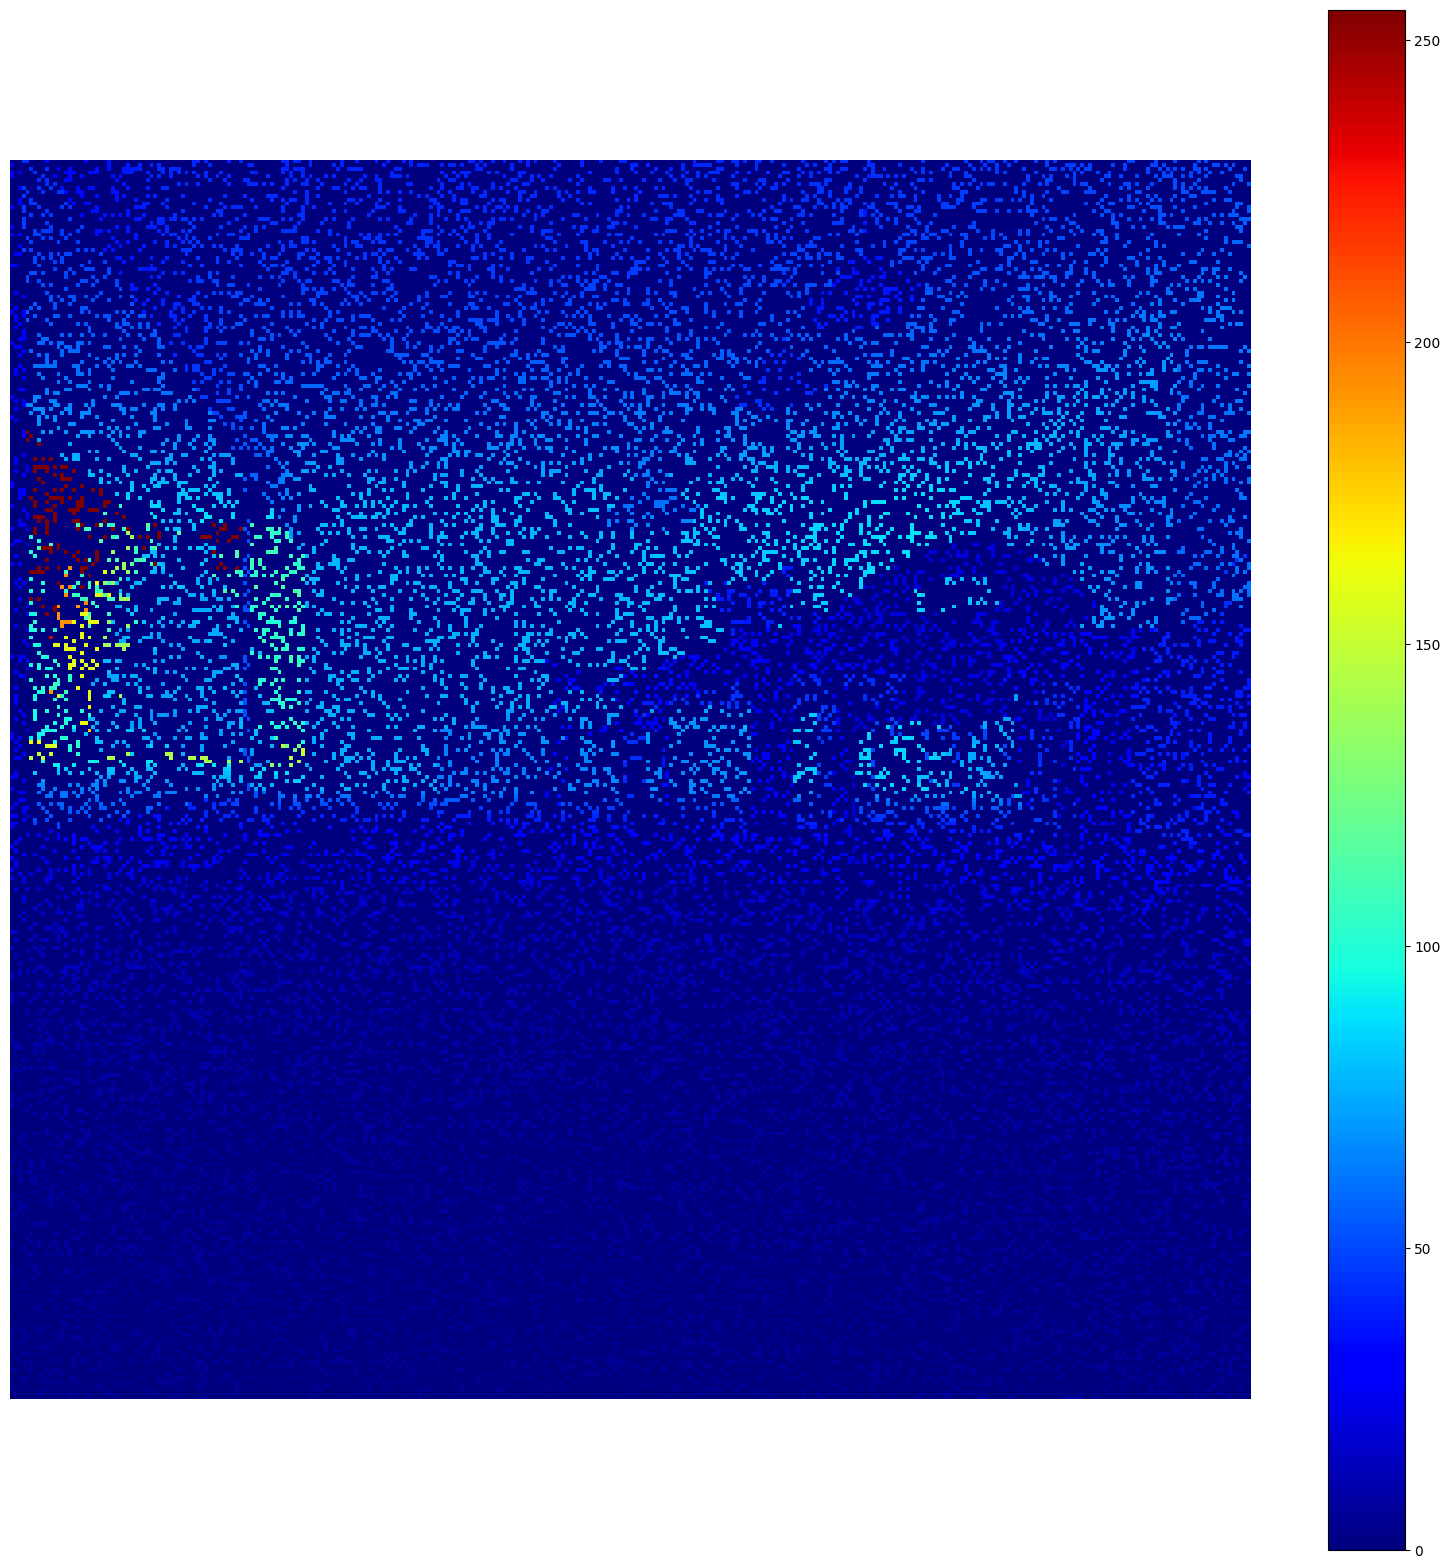

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 图像路径
image_path = '/data1/Chenbingyuan/Trans_G2/g2_dataset/UnrealCV/point/point_0.2/UnrealCV_gt/0985.png'

# 读取图像
image = Image.open(image_path)
image_array = np.array(image)

# 可视化
fig, ax = plt.subplots(figsize=(20,20))
im = ax.imshow(image_array, cmap='jet')  # 使用'jet'颜色映射
ax.axis('off')  # 关闭坐标轴
fig.colorbar(im, ax=ax)  # 添加颜色条

plt.show()
